<a href="https://colab.research.google.com/github/Gaurav-phatkare/Time-Series-Analysis/blob/main/TimeSeries_Analysis_and_Forecasting_Using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis And Forecasting
Using Deep Learning And Tensorflow Library

**BitPredict**

Types of Time series analysis
1. Classification : anomaly or not/Discrate
2. Forecasting : what price will be at particular day/Continuous


###the predictability of an event or a quantity depends on several factors including:
1. how well we understand the factors that contribute to it
2. how much data is available
3. how similar the future is to the past
4. whether the forecasts can affect the thing we are trying to forecast

---

What will the price of Bitcoin be tomorrow?

input size  = [None, 30]
output size  = Horizon

## Get data

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-11-04 13:50:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2023-11-04 13:50:17 (5.38 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ['Date'],
                 index_col = ['Date'])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# how many samples do we have?
df.shape

(2787, 5)

In [6]:
#Only want closing for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [1]:
FIGURE_SIZE = (8,5)

Text(0.5, 1.0, 'Price of Bitcoin from 1 Oct 2013 to 18 may 2021')

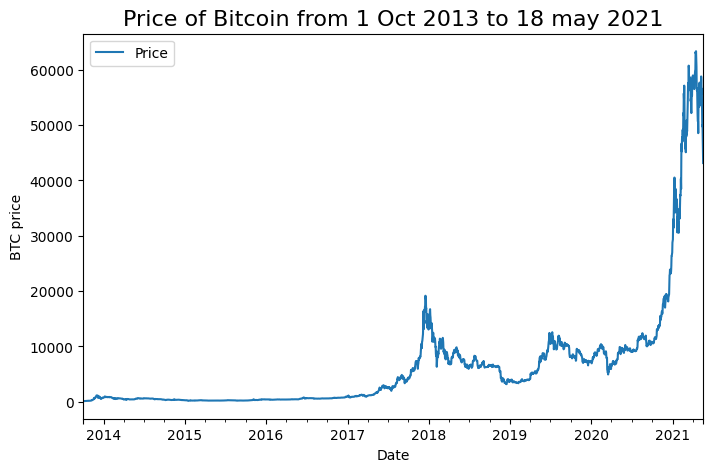

In [7]:
import matplotlib.pyplot as plt
# FIGURE_SIZE = (8,6)
bitcoin_prices.plot(figsize = FIGURE_SIZE)
plt.ylabel("BTC price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 may 2021", fontsize =16)


## Read Data using CSV module

In [8]:
# importing and formating istorical bittcoin data withh python

import csv
from datetime import datetime

timesteps = []
btc_price = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader)

  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

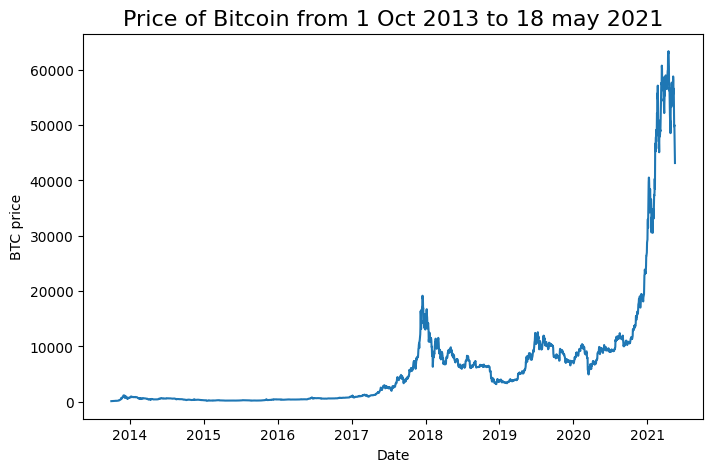

In [9]:
# Plot from csv
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = FIGURE_SIZE)
plt.plot(timesteps, btc_price)

plt.ylabel("BTC price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 may 2021", fontsize =16)
plt.xlabel("Date")

##Format Data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data(the wrong way)

In [10]:
bitcoin_prices[:10]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866
2013-10-06,120.65533
2013-10-07,121.79500
2013-10-08,123.03300
2013-10-09,124.04900


In [11]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
# Wrong way train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size = 0.2,
                                                    random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

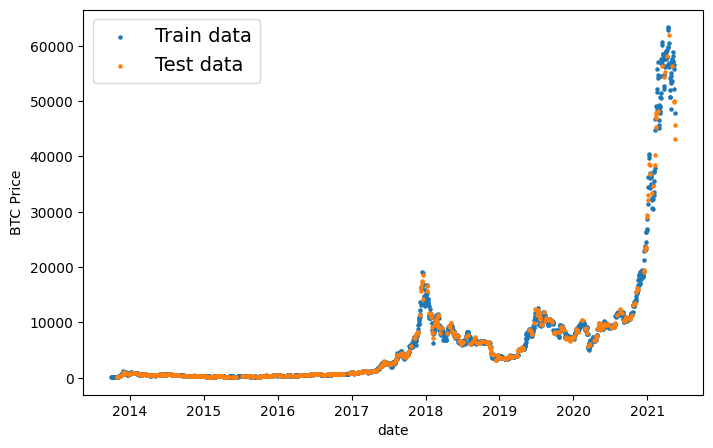

In [14]:
# let plot above split
plt.figure(figsize = FIGURE_SIZE)
plt.scatter(X_train, y_train, s = 5, label = "Train data")
plt.scatter(X_test, y_test, s = 5, label = 'Test data')
plt.xlabel("date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show()

##Create train test split in right way

In [15]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

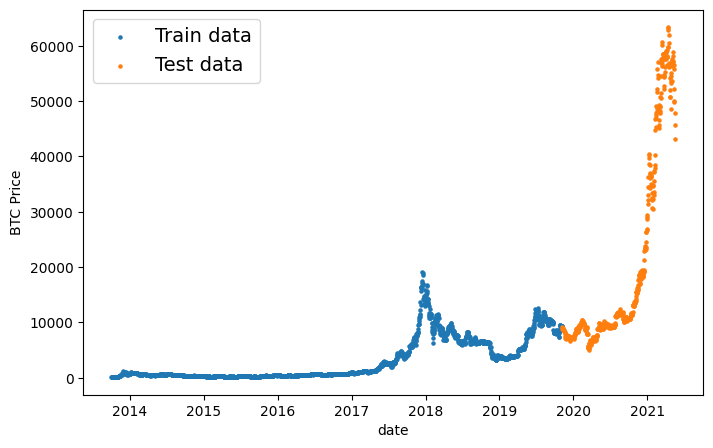

In [16]:
#plot above split
plt.figure(figsize = FIGURE_SIZE)
plt.scatter(X_train, y_train, s = 5, label = "Train data")
plt.scatter(X_test, y_test, s = 5, label = 'Test data')
plt.xlabel("date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show()

## Create a plotting function


In [17]:
def plot_time_series_data(timesteps, values, format = ".", start = 0, end = None, label = None):
  plt.plot(timesteps[start:end], values[start:end], format, label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)


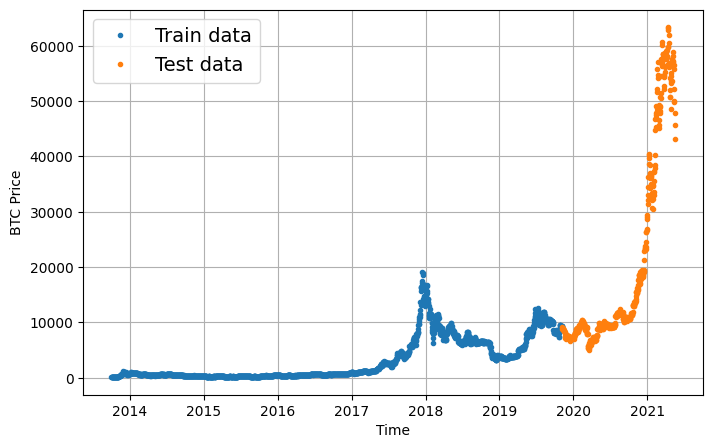

In [18]:
# test above function
plt.figure(figsize=FIGURE_SIZE)
plot_time_series_data(timesteps = X_train, values = y_train, label = 'Train data')
plot_time_series_data(timesteps = X_test,values = y_test,label = 'Test data')

## Experiments we are performing

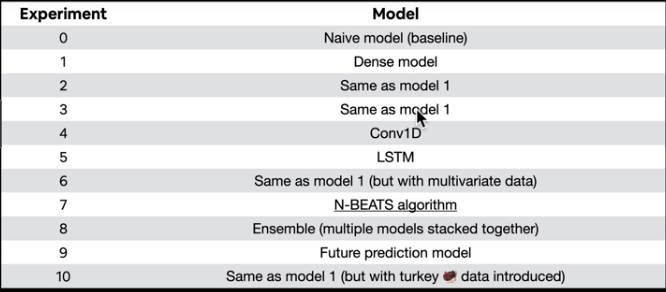

**Horizon**: number o timesteps into the future we re going to predict

**Window Size** : number of timesteps we are going to used to predict horizon

# Model 0 : Naive approach Baseline Model

$$\hat{y}_{t} = y_{t-1}$$

The prediction at timestep t (y-hat) is equal to the value at timestep t-1(previous timestep) this is for a horizon of 1

In [19]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [20]:
#Model Building

naive_forecast = y_test[:-1]


naive_forecast[:5], naive_forecast[-5:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917]),
 array([52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361]))

In [21]:
y_test[:5]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917])

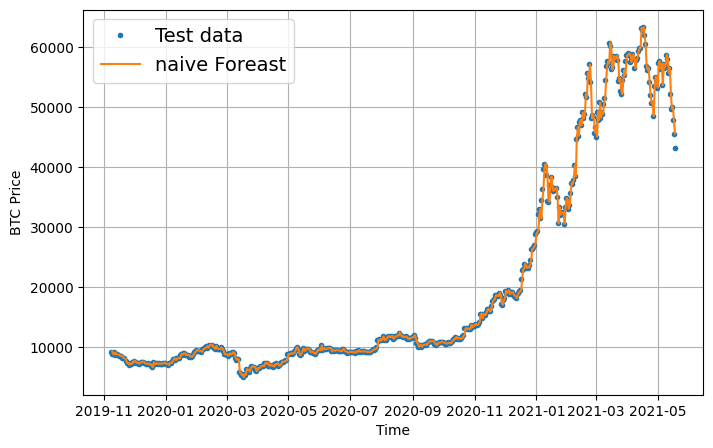

In [22]:
# plot naie forecast

plt.figure(figsize = FIGURE_SIZE)
# plot_time_series_data(timesteps = X_train, values = y_train, label = 'Train data')
plot_time_series_data(timesteps = X_test, values = y_test, label = 'Test data')
plot_time_series_data(timesteps = X_test[1:], values = naive_forecast, format = "-", label = "naive Foreast")

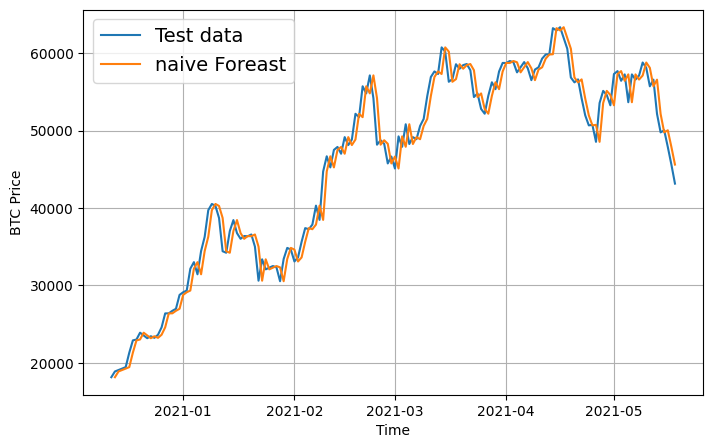

In [23]:
# plot naie forecast

plt.figure(figsize = FIGURE_SIZE)
# plot_time_series_data(timesteps = X_train, values = y_train, label = 'Train data')
plot_time_series_data(timesteps = X_test, values = y_test,start = 400, format = "-" ,label = 'Test data')
plot_time_series_data(timesteps = X_test[1:], values = naive_forecast, start = 400,format = "-", label = "naive Foreast")

## Evaluation metrix for time series model


well it is regression model
* MAE
* MSE
* RMSE
* MAPE
* MASE



In [24]:
import tensorflow as tf

def MASE(y_true, y_pred):
  """
  Implement MASE(assumming no seasonality of data)
  """

  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # find MAE of naive forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season

In [25]:
MASE(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [26]:
# y_test[1:], y_test[:-1]

In [27]:
def evaluate_pred_result(y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rsme = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = MASE(y_true, y_pred)

  return {
      "mae" : mae.numpy(),
      "mse" : mse.numpy(),
      "rsme" : rsme.numpy(),
      "mase" : mase.numpy(),
      "mape" : mape.numpy()
  }

In [28]:
naive_result = evaluate_pred_result(y_test[1:], naive_forecast)

In [29]:
naive_result

{'mae': 567.9802,
 'mse': 1147547.0,
 'rsme': 1071.2362,
 'mase': 0.99957,
 'mape': 2.5165248}

# Formatting data part 2: Windowing our dataset

window
```

* [1,2,3,4,5,6,7] -> [8]
* [2,3,4,5,6,7,8] -> [9]
```

In [30]:
len(y_train)

2229

In [31]:
btc_price[:7], btc_price[7]

([123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
 123.033)

In [32]:
# global variables for window and horizon size
HORIZON = 1
WINDOW_SIZE = 7


In [33]:
def get_labelled_window(x, horizon = HORIZON):
  """
  Creates labels for windowed dataset
  Eg ig horizon = 1
  Input = [0,1,2,3,4,5,6,7,8] --> Output:([0,1,2,3,4,5,6,7],[8])
  """
  return x[:, :-horizon],x[:, -horizon:]

In [34]:
# test out above the window labelling function

test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis = 0))

In [35]:
test_window , test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [36]:
type(btc_price)

list

In [37]:
import numpy as np
def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):

  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis = 0).T

  # print(f"Window indexes :\n {window_indexes, window_indexes.shape}")

  windowed_arr = x[window_indexes]

  windows, labels = get_labelled_window(windowed_arr, horizon = horizon)
  return windows, labels

In [38]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [39]:
#first three windows and labels
for i in range(4):
  print(f"Window : {full_windows[i]}  -->  Label : {full_labels[i]}")

Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]  -->  Label : [123.033]
Window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ]  -->  Label : [124.049]
Window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ]  -->  Label : [125.96116]
Window : [118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116]  -->  Label : [125.27966]


In [40]:
#Last three windows and labels
for i in range(4):
  print(f"Window : {full_windows[i-3]}  -->  Label : {full_labels[i-3]}")

Window : [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676]  -->  Label : [47885.62525472]
Window : [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472]  -->  Label : [45604.61575361]
Window : [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361]  -->  Label : [43144.47129086]
Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]  -->  Label : [123.033]


## Splitting into train and test

In [41]:
def make_train_test_splits(windows, labels,test_split = 0.2):
  splits_size = int(len(windows) * (1-test_split))
  train_windows = windows[:splits_size]
  train_labels  = labels[:splits_size]

  test_windows = windows[splits_size:]
  test_labels = labels[splits_size:]

  return train_windows, test_windows, train_labels, test_labels

In [42]:
# create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

## modelling Checkpoint Callback

In [43]:
import os

# create a function to implement a modelcheckpoint call with a specific filename
def create_model_checkpoint(model_name, save_path = 'model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path,model_name),

                                                                    verbose = 0,
                                                                    save_best_only = True)

# Model 1 : Dense Model (window = 7, horizon = 1)

In [44]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON, activation ="linear" )
], name = 'model_1_dense')

model_1.compile(loss = 'mae',
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])


model_1_history = model_1.fit(x=train_windows,
                              y=train_labels,
                              epochs = 100,
                              verbose = 1,
                              batch_size = 128,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 104ms/step - loss: 2861.5144 - mae: 2861.5144 - mse: 23282218.0000 - val_loss: 3127.8855 - val_mae: 3127.8855 - val_mse: 20024472.0000
Epoch 2/100
18/18 [==============================] - 1s 76ms/step - loss: 417.0123 - mae: 417.0123 - mse: 649564.4375 - val_loss: 1941.4449 - val_mae: 1941.4447 - val_mse: 8939980.0000
Epoch 3/100
18/18 [==============================] - 1s 82ms/step - loss: 266.0031 - mae: 266.0031 - mse: 319984.6562 - val_loss: 1163.8546 - val_mae: 1163.8546 - val_mse: 4130044.2500
Epoch 4/100
18/18 [==============================] - 2s 125ms/step - loss: 196.4692 - mae: 196.4692 - mse: 198266.1250 - val_loss: 1134.3856 - val_mae: 1134.3856 - val_mse: 3876650.0000
Epoch 5/100
18/18 [==============================] - 2s 117ms/step - loss: 187.2015 - mae: 187.2015 - mse: 186758.2656 - val_loss: 1006.7803 - val_mae: 1006.7803 - val_mse: 3315301.5000
Epoch 6/100
18/18 [==============================] - 1s 68ms/step -

In [45]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 564.0458 - mae: 564.0458 - mse: 1155947.1250


[564.0458374023438, 564.0458374023438, 1155947.125]

In [46]:
# [989.0361938476562, 989.0361938476562, 3559146.0
# [670.2048950195312, 670.2048950195312, 1605891.625]

In [47]:
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 564.0458 - mae: 564.0458 - mse: 1155947.1250


[564.0458374023438, 564.0458374023438, 1155947.125]

## model prediction function


In [48]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [49]:
model_1_preds = make_preds(model_1, test_windows)

18/18 [==============================] - 0s 2ms/step


In [50]:
len(model_1_preds), model_1_preds[:10]

(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8858.894, 8779.735, 9055.444, 8798.239, 8739.527, 8757.591,
        8691.893, 8526.728, 8471.538, 8540.77 ], dtype=float32)>)

In [51]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [52]:
# Evaluate preds
model_1_result = evaluate_pred_result(tf.squeeze(test_labels),
                                     model_1_preds)

In [53]:
naive_result

{'mae': 567.9802,
 'mse': 1147547.0,
 'rsme': 1071.2362,
 'mase': 0.99957,
 'mape': 2.5165248}

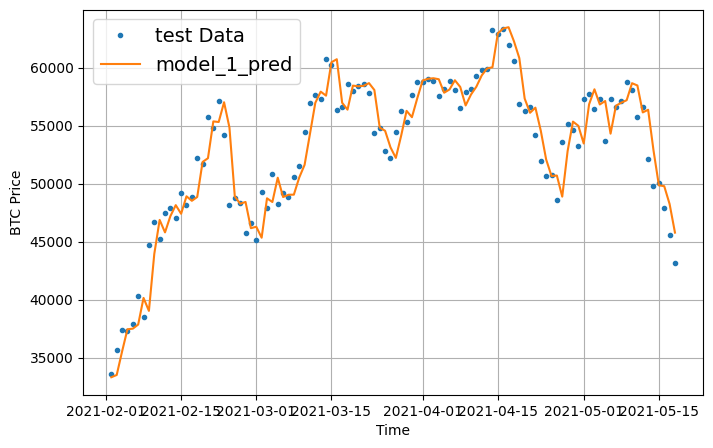

In [54]:
offset = 450


plt.figure(figsize = FIGURE_SIZE)

plot_time_series_data(timesteps = X_test[-len(test_windows):],
                      values = test_labels[:, 0],
                      start = offset,
                      label = "test Data")

plot_time_series_data(timesteps = X_test[-len(test_windows):],
                      values = model_1_preds,
                      start = offset,
                      format = "-",
                      label = "model_1_pred")


# Model 2 : Dense Model (window = 30, horizon = 1)

In [55]:
HORIZON = 1
WINDOW_SIZE = 30


In [56]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

In [57]:
len(full_windows), len(full_labels)

(2757, 2757)

In [58]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows = full_windows,
    labels = full_labels,
    test_split = 0.2
)

In [59]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [60]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = "model_2_Dense")



model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

history_model_2 = model_2.fit(train_windows,
                              train_labels,
                              epochs = 100,
                              batch_size = 128,
                              verbose = 1,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 37ms/step - loss: 320.9033 - val_loss: 1361.7555
Epoch 2/100
18/18 [==============================] - 1s 30ms/step - loss: 200.4736 - val_loss: 938.6132
Epoch 3/100
18/18 [==============================] - 1s 30ms/step - loss: 170.8216 - val_loss: 889.3135
Epoch 4/100
18/18 [==============================] - 0s 28ms/step - loss: 160.0586 - val_loss: 883.0220
Epoch 5/100
18/18 [==============================] - 1s 29ms/step - loss: 161.6246 - val_loss: 862.6824
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 184.4258 - val_loss: 1496.5729
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 203.3579 - val_loss: 875.3380
Epoch 8/100
18/18 [==============================] - 1s 31ms/step - loss: 159.5026 - val_loss: 859.5483
Epoch 9/100
18/18 [==============================] - 0s 28ms/step - loss: 159.7803 - val_loss: 819.0338
Epoch 10/100
18/18 [==============================] - 0s 28ms/st

In [61]:
# evaluate model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 650.3746


650.3746337890625

In [62]:
# load in best performance model

model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_Dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 609.6257


609.625732421875

In [63]:
# forecast predictions

model_2_preds = make_preds(model_2,
                           test_windows)


18/18 [==============================] - 0s 2ms/step


In [64]:
model_2_results = evaluate_pred_result(tf.squeeze(test_labels),
                                 model_2_preds)

model_2_results

{'mae': 609.62555,
 'mse': 1295658.1,
 'rsme': 1138.2698,
 'mase': 1.0656314,
 'mape': 2.785401}

In [65]:
model_1_result

{'mae': 564.0458,
 'mse': 1155947.0,
 'rsme': 1075.1498,
 'mase': 0.9908722,
 'mape': 2.510887}

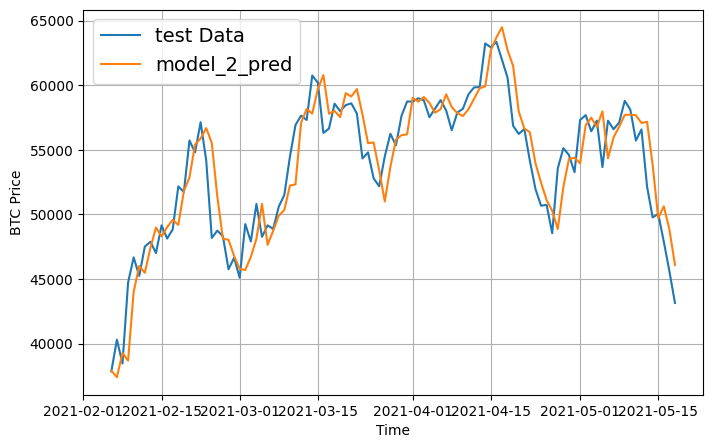

In [66]:
offset = 450


plt.figure(figsize = FIGURE_SIZE)

plot_time_series_data(timesteps = X_test[-len(test_windows):],
                      values = test_labels[:, 0],
                      start = offset,
                      format = "-",
                      label = "test Data")

plot_time_series_data(timesteps = X_test[-len(test_windows):],
                      values = model_2_preds,
                      start = offset,
                      format = "-",
                      label = "model_2_pred")

# Model 3 : Dense Model (window = 30, horizon = 7)

In [67]:
HORIZON = 7
WINDOW_SIZE = 30


full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [68]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows = full_windows,
    labels = full_labels,
    test_split = 0.2
)

In [69]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [70]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
],name = 'model_3_dense')


model_3.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

history_model_3 = model_3.fit(train_windows,
                    train_labels,
                    batch_size = 128,
                    epochs = 100,
                    verbose  = 1,
                    validation_data = (test_windows, test_labels),
                    callbacks = [create_model_checkpoint(model_name=model_3.name)])


Epoch 1/100
18/18 [==============================] - 1s 35ms/step - loss: 1195.0275 - val_loss: 2769.3784
Epoch 2/100
18/18 [==============================] - 0s 29ms/step - loss: 501.3099 - val_loss: 2140.4070
Epoch 3/100
18/18 [==============================] - 0s 28ms/step - loss: 411.3000 - val_loss: 2019.7775
Epoch 4/100
18/18 [==============================] - 0s 29ms/step - loss: 366.1995 - val_loss: 1880.8618
Epoch 5/100
18/18 [==============================] - 0s 29ms/step - loss: 336.7689 - val_loss: 1852.3634
Epoch 6/100
18/18 [==============================] - 1s 29ms/step - loss: 315.4859 - val_loss: 1692.0431
Epoch 7/100
18/18 [==============================] - 0s 27ms/step - loss: 296.9002 - val_loss: 1576.5431
Epoch 8/100
18/18 [==============================] - 0s 27ms/step - loss: 289.0780 - val_loss: 1510.2561
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 281.7833 - val_loss: 1627.4792
Epoch 10/100
18/18 [==============================] - 0

In [71]:
# Evaluate
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1355.6564


1355.6563720703125

In [72]:
model_3 = tf.keras.models.load_model('/content/model_experiments/model_3_dense')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1227.8435


1227.843505859375

In [73]:
# forecast predictions

model_3_preds = make_preds(model_3,
                           test_windows)


18/18 [==============================] - 0s 2ms/step


In [74]:
model_3_results = evaluate_pred_result(tf.squeeze(test_labels),
                                 model_3_preds)

model_3_results

{'mae': array([  642.3878  ,   393.7853  ,   397.67633 ,   408.66    ,
          337.2652  ,   408.82986 ,   475.77817 ,   462.21533 ,
          471.0139  ,   539.7159  ,   825.0058  ,   731.4025  ,
          745.4604  ,   881.2889  ,   603.9033  ,   139.3058  ,
          183.9744  ,   296.0399  ,   316.4139  ,   353.92368 ,
          246.08768 ,   174.76807 ,   268.89258 ,   318.48306 ,
           99.459335,   113.80978 ,   146.80957 ,   152.15115 ,
          164.05705 ,   173.78557 ,   248.71275 ,   283.762   ,
          269.72308 ,   326.71414 ,   212.65234 ,   263.2613  ,
          292.45828 ,   187.98709 ,   191.37375 ,   230.95988 ,
          519.0357  ,    98.35582 ,    80.53983 ,   115.69971 ,
           99.44043 ,    70.856514,    92.075264,    67.77741 ,
          140.1949  ,   157.86182 ,   116.7643  ,   106.723145,
          259.44998 ,   128.05266 ,   244.76848 ,   297.7888  ,
          592.29297 ,   542.858   ,   485.02252 ,   591.5566  ,
          356.9804  ,   199.18332

In [75]:
model_3_preds.shape,model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

In [76]:
def evaluate_pred_result(y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rsme = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = MASE(y_true, y_pred)



  # account for different sized metrics
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rsme = tf.reduce_mean(rsme)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)


  return {
      "mae" : mae.numpy(),
      "mse" : mse.numpy(),
      "rsme" : rsme.numpy(),
      "mase" : mase.numpy(),
      "mape" : mape.numpy()
  }

In [77]:
model_3_results = evaluate_pred_result(tf.squeeze(test_labels),
                                       model_3_preds)

In [78]:
model_3_results

{'mae': 1227.8435,
 'mse': 5357267.5,
 'rsme': 1409.0077,
 'mase': 2.1848786,
 'mape': 5.486288}

In [79]:
# t = [[1,2],[2,3],[4,5],[6,7],[2,3]]
# p = [[2,3],[5,6],[6,7],[3,4],[5,6]]

# tf.keras.metrics.mean_absolute_error(t, p)

In [80]:
# tf.reduce_mean([1, 3, 2, 3, 3])

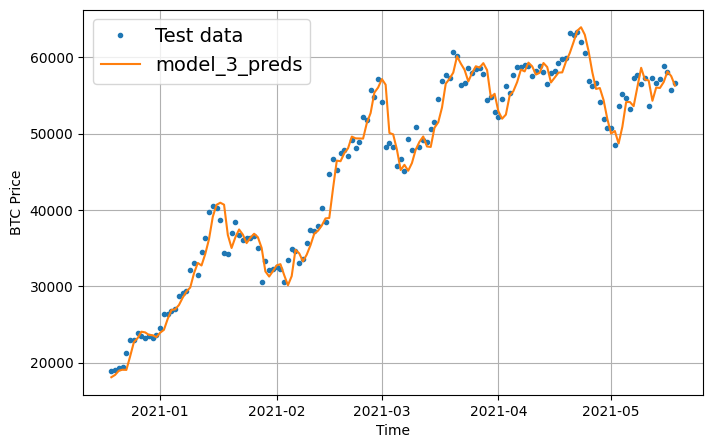

In [81]:
offset = 400
plt.figure(figsize = FIGURE_SIZE)
plot_time_series_data(timesteps=X_test[-len(test_windows):], values = test_labels[:, 0], start = offset, label = 'Test data')
plot_time_series_data(timesteps = X_test[-len(test_windows):],format = "-", values = model_3_preds[:,0], start =offset, label = 'model_3_preds' )

In [82]:
test_labels[0]


array([8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
       8760.89271814, 8749.52059102, 8656.97092235])

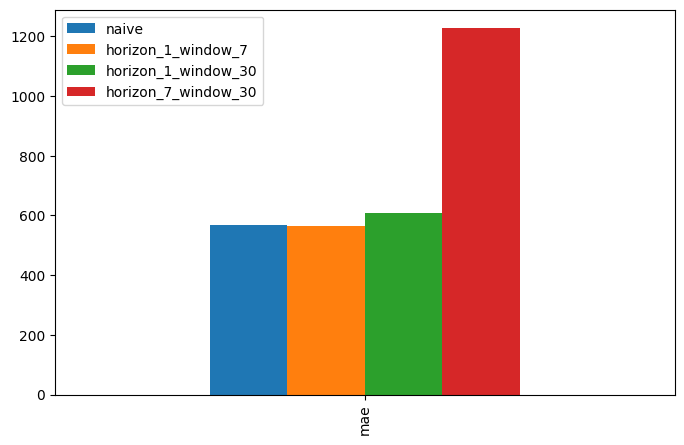

In [83]:
pd.DataFrame({"naive": naive_result["mae"],
              "horizon_1_window_7": model_1_result["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=FIGURE_SIZE, kind="bar");

# Model 4 : Conv1D

In [84]:
HORIZON = 1
WINDOW_SIZE = 7

# Create windowed dataset

full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [85]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows),len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [86]:
# Check data input shape
train_windows[0].shape

(7,)

to use conv1D layer, we need an input shape of :(batch size, timesteps, input_dim)

In [87]:
x = tf.constant(train_windows[0])
print(x)
y = tf.expand_dims(x, axis=1)
print(y)

tf.Tensor([123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ], shape=(7,), dtype=float64)
tf.Tensor(
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]], shape=(7, 1), dtype=float64)


In [88]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))

In [89]:
expand_dims_layer

In [90]:
print(f"Original Shape : {x.shape}")
print(f"Expanded Shape : {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original Shape : (7,)
Expanded Shape : (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [91]:
# model buidling
tf.random.set_seed(42)


model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    layers.Conv1D(filters = 128,kernel_size = 5, strides = 1, padding = "causal", activation = "relu" ),
    layers.Dense(HORIZON)
], name = "model_4_conv1D")

model_4.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())


history_model_4 = model_4.fit(
    train_windows,
    train_labels,
    batch_size = 128,
    epochs = 100,
    verbose = 1,
    validation_data = (test_windows, test_labels),
    callbacks = [create_model_checkpoint(model_name = model_4.name)]
)

Epoch 1/100
18/18 [==============================] - 2s 79ms/step - loss: 1581.7322 - val_loss: 1387.3339
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 304.2926 - val_loss: 1451.0217
Epoch 3/100
18/18 [==============================] - 1s 59ms/step - loss: 220.0107 - val_loss: 1089.8892
Epoch 4/100
18/18 [==============================] - 1s 56ms/step - loss: 195.6249 - val_loss: 1076.4987
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 191.6297 - val_loss: 1077.0499
Epoch 6/100
18/18 [==============================] - 1s 49ms/step - loss: 189.9298 - val_loss: 1058.4543
Epoch 7/100
18/18 [==============================] - 1s 39ms/step - loss: 189.5057 - val_loss: 1041.6263
Epoch 8/100
18/18 [==============================] - 1s 39ms/step - loss: 184.5125 - val_loss: 1039.3615
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 181.9918 - val_loss: 1048.8673
Epoch 10/100
18/18 [==============================] - 1s 

In [92]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
# evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 596.1596


596.1596069335938

In [94]:
model_4 = tf.keras.models.load_model('/content/model_experiments/model_4_conv1D')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 569.3365


569.3365478515625

In [95]:
# make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8895.538 , 8807.0205, 9004.169 , 8786.513 , 8761.138 , 8739.948 ,
       8676.7705, 8557.554 , 8463.23  , 8524.487 ], dtype=float32)>

In [96]:
model_4_results = evaluate_pred_result(tf.squeeze(test_labels),model_4_preds)

In [97]:
model_4_results


{'mae': 569.3367,
 'mse': 1181806.4,
 'rsme': 1087.1091,
 'mase': 1.0001669,
 'mape': 2.5499244}

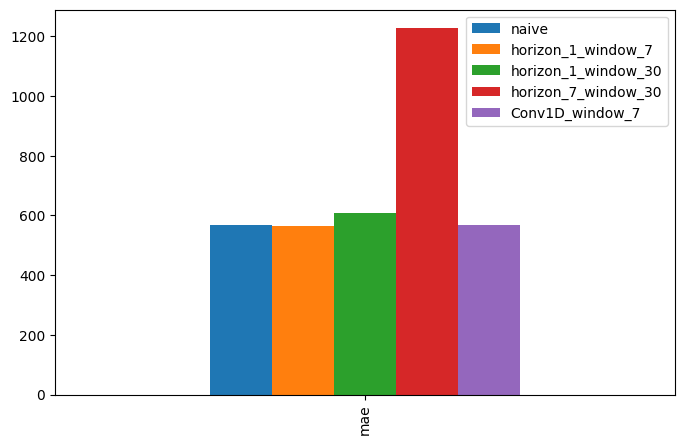

In [98]:
pd.DataFrame({"naive": naive_result["mae"],
              "horizon_1_window_7": model_1_result["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
             "Conv1D_window_7":model_4_results['mae']}, index=["mae"]).plot(figsize=FIGURE_SIZE, kind="bar");

#Model 5: RNN(LSTM)

In [99]:
train_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [100]:
tf.random.set_seed(42)

inputs =layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)

# x = layers.LSTM(128,return_sequences = True)(x)

x = layers.LSTM(128, activation = 'relu')(x)

# x = layers.Dense(32, activation = 'relu')(x)
output = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs = inputs, outputs = output, name = 'model_5_LSTM')


model_5.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

history_model_5 = model_5.fit(train_windows,
                              train_labels,
                              epochs = 100,
                              verbose = 1,
                              batch_size = 128,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 131ms/step - loss: 1884.3606 - val_loss: 5356.9717
Epoch 2/100
18/18 [==============================] - 3s 148ms/step - loss: 344.3413 - val_loss: 1115.0789
Epoch 3/100
18/18 [==============================] - 2s 133ms/step - loss: 197.2170 - val_loss: 1048.3018
Epoch 4/100
18/18 [==============================] - 2s 108ms/step - loss: 190.0557 - val_loss: 1041.0820
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 185.8877 - val_loss: 1043.9373
Epoch 6/100
18/18 [==============================] - 2s 107ms/step - loss: 187.7321 - val_loss: 1024.0839
Epoch 7/100
18/18 [==============================] - 2s 106ms/step - loss: 186.1933 - val_loss: 1021.0004
Epoch 8/100
18/18 [==============================] - 2s 113ms/step - loss: 180.3056 - val_loss: 1009.3943
Epoch 9/100
18/18 [==============================] - 0s 12ms/step - loss: 178.7911 - val_loss: 1011.3522
Epoch 10/100
18/18 [============================

In [101]:
# evaluate model
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 592.6447


592.6447143554688

In [102]:
# Load in best perfomance model
model_5 = tf.keras.models.load_model('/content/model_experiments/model_5_LSTM')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 578.8295


578.8295288085938

In [103]:
# check perfomance

model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8925.697, 8795.702, 8983.835, 8798.945, 8736.576], dtype=float32)>

In [104]:
model_5_results = evaluate_pred_result(tf.squeeze(test_labels),
                                       model_5_preds)

In [105]:
model_5_results

{'mae': 578.8295,
 'mse': 1212218.5,
 'rsme': 1101.0079,
 'mase': 1.0168432,
 'mape': 2.6127892}

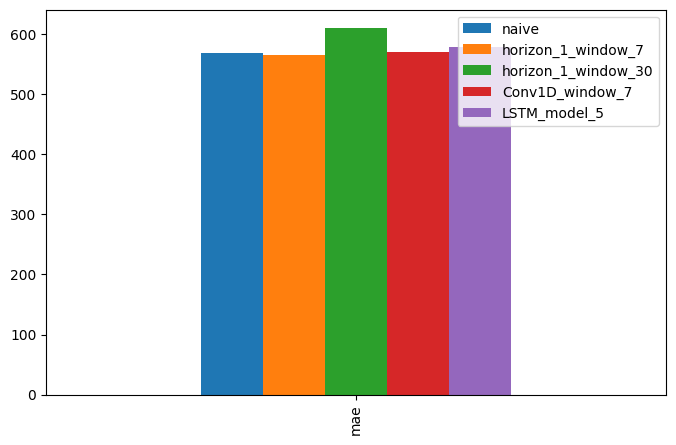

In [106]:
pd.DataFrame({"naive": naive_result["mae"],
              "horizon_1_window_7": model_1_result["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              # "horizon_7_window_30": model_3_results["mae"],
             "Conv1D_window_7":model_4_results['mae'],
              "LSTM_model_5":model_5_results['mae']}, index=["mae"]).plot(figsize=FIGURE_SIZE, kind="bar");

# Make Multivariate time series dataset

Bitcoin Halving Events can significently affect Price of Bitcoins over the time

In [107]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [108]:
block_reward_1 = 50
block_reward_2 = 25 # 8 november 2012
block_reward_3 = 12.5 # 9 july 216
block_reward_4 = 6.25 # 10 may 2020


# Block reward dates

block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

In [109]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [110]:
# create a date ranges of where specific block reward values should be

block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2421)

In [111]:
# add a block reward column

bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None


bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [112]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


<Axes: xlabel='Date'>

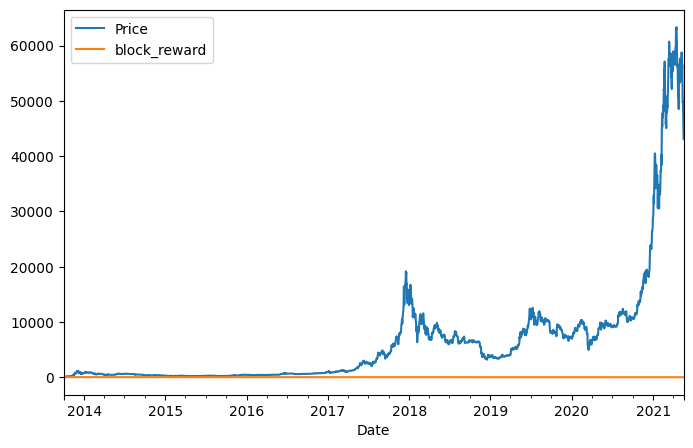

In [113]:
bitcoin_prices_block.plot(figsize = FIGURE_SIZE)

<Axes: xlabel='Date'>

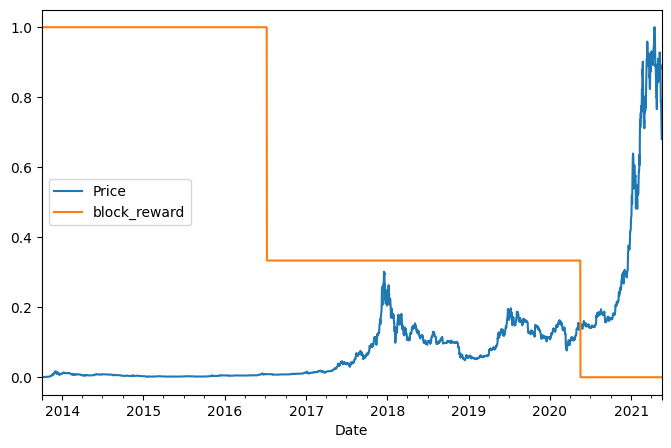

In [114]:
# plot the block reward vs price over time

from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price','block_reward']]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize = FIGURE_SIZE)

## Making windowed dataset with pandas
previously there was univariate data ,now we have multivariate data

In [115]:
HORIZON

1

In [116]:
WINDOW_SIZE

7

In [117]:
# make a copy of the bitcoin data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [118]:
bitcoin_prices_windowed.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [119]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [120]:
# Create X(windows) and y (horizons) Features

X = bitcoin_prices_windowed.dropna().drop('Price', axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [121]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [122]:
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [123]:
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [124]:
X_train.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


# Model 6: Dense(multivariate model)

In [125]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_6_dense_multivariate')

model_6.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

history_6_model = model_6.fit(
    X_train, y_train,
    epochs = 100,
    batch_size = 128,
    verbose = 1,
    validation_data = (X_test, y_test),
    callbacks = [create_model_checkpoint(model_name = model_6.name)]
)

Epoch 1/100
18/18 [==============================] - 1s 46ms/step - loss: 1291.1470 - val_loss: 1050.7415
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 270.9773 - val_loss: 1105.3033
Epoch 3/100
18/18 [==============================] - 1s 37ms/step - loss: 181.7118 - val_loss: 957.4141
Epoch 4/100
18/18 [==============================] - 1s 37ms/step - loss: 167.8898 - val_loss: 916.1015
Epoch 5/100
18/18 [==============================] - 1s 37ms/step - loss: 146.8058 - val_loss: 790.6782
Epoch 6/100
18/18 [==============================] - 1s 37ms/step - loss: 131.1622 - val_loss: 724.0586
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 127.0744 - val_loss: 724.9632
Epoch 8/100
18/18 [==============================] - 1s 83ms/step - loss: 123.2323 - val_loss: 627.0305
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 118.0054 - val_loss: 728.0288
Epoch 10/100
18/18 [==============================] - 0s 9ms/ste

In [126]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 568.4519


568.451904296875

In [127]:
# Load the best performance from model 6 history

model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 566.4201


566.4201049804688

In [128]:
# make predictions
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8838.159, 8769.067, 9041.076, 8771.404, 8732.42 , 8757.048,
       8665.819, 8519.205, 8454.451, 8528.059], dtype=float32)>

In [129]:
model_6_results = evaluate_pred_result(y_test, model_6_preds)
model_6_results

{'mae': 566.42017,
 'mse': 1159913.5,
 'rsme': 1076.9928,
 'mase': 0.99504334,
 'mape': 2.539613}

In [130]:
model_1_result

{'mae': 564.0458,
 'mse': 1155947.0,
 'rsme': 1075.1498,
 'mase': 0.9908722,
 'mape': 2.510887}

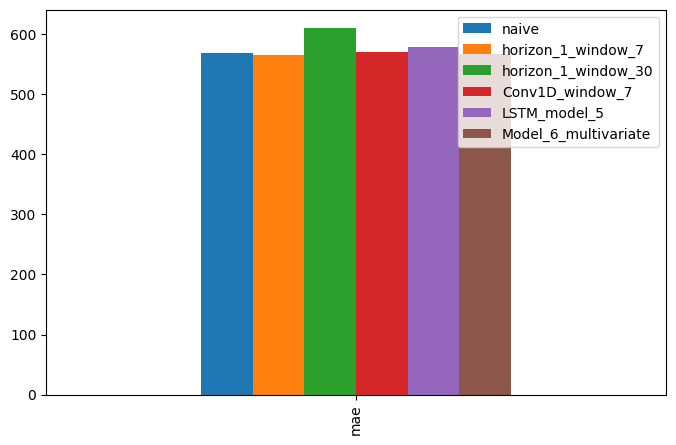

In [131]:
pd.DataFrame({"naive": naive_result["mae"],
              "horizon_1_window_7": model_1_result["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              # "horizon_7_window_30": model_3_results["mae"],
             "Conv1D_window_7":model_4_results['mae'],
              "LSTM_model_5":model_5_results['mae'],
              "Model_6_multivariate":model_6_results['mae']}, index=["mae"]).plot(figsize=FIGURE_SIZE, kind="bar");